# Importing the tools we will use

In [1]:
import numpy as np #do matrix calculations and more
import pandas as pd #read the data
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

from sklearn.metrics import confusion_matrix 
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum() #sum of null data in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info() #types of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
(df.isnull().sum()/df.shape[0])*100 #percentage of null data in each column

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### we should delete the Cabin column based on the percentage of null values

### we should delete Ticket and passengerid because there is no need for it

In [6]:
df.drop(["Cabin","PassengerId","Ticket"],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## preprocessing time

In [7]:
# Names column first
df["Rel_status"]=df["Name"].str.split(",", n = 1, expand = True)[1].str[:10]
df["Rel_status"]=df["Rel_status"].str.split(".", n = 1, expand = True)[0] 
df.drop(["Name"],axis=1,inplace=True) #now no need for that column anymore
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Rel_status
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [8]:
# fill nan values
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True) #fill with the mode
df["Age"].fillna(df["Age"].mean(),inplace=True) #fill with the mean

In [9]:
print((df.isnull().sum()/df.shape[0])*100,"\n\nnow it is perfect")

Survived      0.0
Pclass        0.0
Sex           0.0
Age           0.0
SibSp         0.0
Parch         0.0
Fare          0.0
Embarked      0.0
Rel_status    0.0
dtype: float64 

now it is perfect


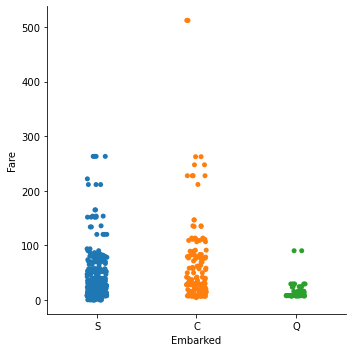

In [10]:
#now the embarked column
sns.catplot(data=df,x="Embarked",y="Fare");

Now we will rank them by it's values c is the most expensive then s then q

In [11]:
df["Embarked"]= np.where(df["Embarked"]=="C",3,df["Embarked"])
df["Embarked"]= np.where(df["Embarked"]=="S",2,df["Embarked"]) 
df["Embarked"]= np.where(df["Embarked"]=="Q",1,df["Embarked"]) 

In [12]:
df.shape

(891, 9)

In [13]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    df_final.dropna(inplace=True)
    return df_final

In [14]:
df = remove_outlier_IQR(df)

C:\Users\AHMEDA~1\AppData\Local\Temp/ipykernel_16916/1833139250.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]


In [15]:
df.shape # seem there are no outliers

(577, 9)

In [16]:
df = pd.get_dummies(data=df,columns=["Rel_status","Sex"],drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Rel_status_ Dr,Rel_status_ Jonkheer,Rel_status_ Lady,Rel_status_ Major,Rel_status_ Master,Rel_status_ Miss,Rel_status_ Mlle,Rel_status_ Mr,Rel_status_ Mrs,Rel_status_ Ms,Rel_status_ Rev,Rel_status_ Sir,Sex_male
0,0,3,22.000000,1.0,0.0,7.2500,2,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,3,26.000000,0.0,0.0,7.9250,2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,35.000000,1.0,0.0,53.1000,2,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,3,35.000000,0.0,0.0,8.0500,2,0,0,0,0,0,0,0,1,0,0,0,0,1
5,0,3,29.699118,0.0,0.0,8.4583,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,25.000000,0.0,0.0,7.0500,2,0,0,0,0,0,0,0,1,0,0,0,0,1
886,0,2,27.000000,0.0,0.0,13.0000,2,0,0,0,0,0,0,0,0,0,0,1,0,1
887,1,1,19.000000,0.0,0.0,30.0000,2,0,0,0,0,0,1,0,0,0,0,0,0,0
889,1,1,26.000000,0.0,0.0,30.0000,3,0,0,0,0,0,0,0,1,0,0,0,0,1


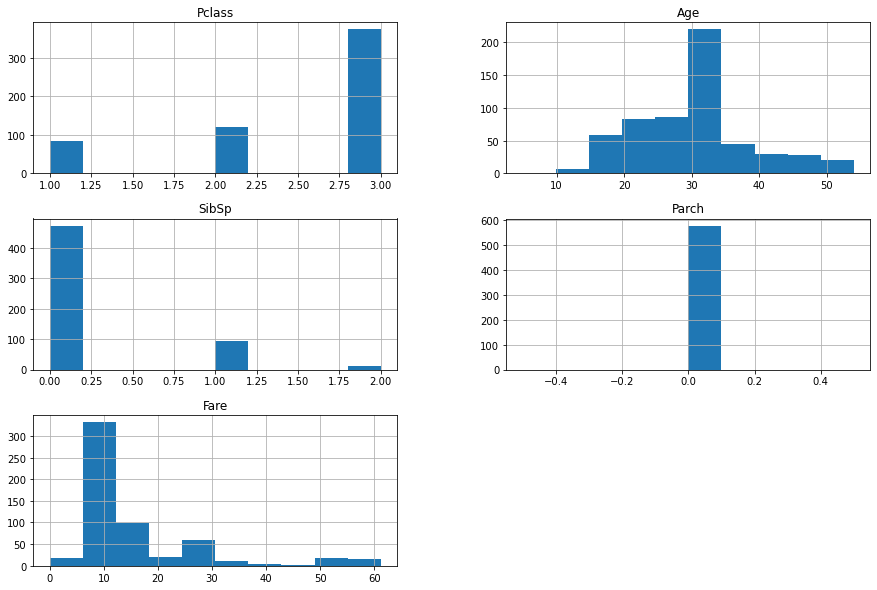

In [17]:
df[["Pclass","Age","SibSp","Parch","Fare"]].hist(figsize=(15,10));

## scaling

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(["Survived"],axis=1)
Y = df[["Survived"]]

In [19]:
Y

,Survived
0,0
2,1
3,1
4,0
5,0
...,...
884,0
886,0
887,1
889,1


In [20]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = scale.fit_transform(X)

In [91]:
df_new = pd.DataFrame(X)

df_new = Y.join(df_new,how="right")

df_new = df_new.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [92]:
df_new

,Survived,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.67833,-0.909802,1.800735,0.0,-0.609448,-0.055593,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,-0.435535,-0.041667,0.611400,-0.297791,-0.041667,-0.083551,-0.041667,0.574015
2,1.0,-2.04917,0.617882,1.800735,0.0,3.030715,-0.055593,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,-0.435535,-0.041667,-1.635591,3.358064,-0.041667,-0.083551,-0.041667,-1.742115
3,1.0,0.67833,0.617882,-0.448235,0.0,-0.545934,-0.055593,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,-0.435535,-0.041667,0.611400,-0.297791,-0.041667,-0.083551,-0.041667,0.574015
4,0.0,0.67833,-0.005046,-0.448235,0.0,-0.513517,-2.060419,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,-0.435535,-0.041667,0.611400,-0.297791,-0.041667,-0.083551,-0.041667,0.574015
5,0.0,-2.04917,2.850651,-0.448235,0.0,2.932466,-0.055593,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,-0.435535,-0.041667,0.611400,-0.297791,-0.041667,-0.083551,-0.041667,0.574015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,1.0,0.67833,-0.557259,-0.448235,0.0,-0.625326,-0.055593,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,-0.435535,-0.041667,0.611400,-0.297791,-0.041667,-0.083551,-0.041667,0.574015
573,1.0,-0.68542,-0.322231,-0.448235,0.0,-0.152939,-0.055593,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,-0.435535,-0.041667,-1.635591,-0.297791,-0.041667,11.968709,-0.041667,0.574015
574,0.0,-2.04917,-1.262344,-0.448235,0.0,1.196740,-0.055593,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,2.296027,-0.041667,-1.635591,-0.297791,-0.041667,-0.083551,-0.041667,-1.742115
575,0.0,-2.04917,-0.439745,-0.448235,0.0,1.196740,1.949233,-0.093495,-0.041667,-0.041667,-0.058977,-0.041667,-0.435535,-0.041667,0.611400,-0.297791,-0.041667,-0.083551,-0.041667,0.574015


In [93]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(n_jobs=-1,max_iter=10000,random_state=42)

reg.fit(X_train,y_train)

C:\Users\AhmedAshraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, n_jobs=-1, random_state=42)

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test,reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        87
           1       0.61      0.59      0.60        29

    accuracy                           0.80       116
   macro avg       0.74      0.73      0.73       116
weighted avg       0.80      0.80      0.80       116



# But for high accuracy algorithm

In [115]:
from xgboost import XGBRFClassifier

clf = XGBRFClassifier(learning_rate=0.01,n_estimators=100,random_state=24,use_label_encoder=False)

clf.fit(X_train,y_train)

[02:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                learning_rate=0.01, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_state=24,
                reg_alpha=0, scale_pos_weight=1, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, verbosity=None)

In [116]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        87
           1       0.79      0.66      0.72        29

    accuracy                           0.87       116
   macro avg       0.84      0.80      0.82       116
weighted avg       0.87      0.87      0.87       116

